# Librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv

# Carga de datos

In [2]:
def limpiar_valor(valor):
    valor = valor.strip()
    partes = valor.split('.')
    
    if len(partes) <= 2:
        # Tiene uno o ningún punto → está bien
        return valor
    else:
        # Más de un punto → unimos todo menos el último con '' y dejamos el último como decimal
        entero = ''.join(partes[:-1])
        decimal = partes[-1]
        return f"{entero}.{decimal}"

def datos(csv_file_path):
    tabla = []
    with open(csv_file_path, newline='', encoding='utf-8') as archivo:
        lector = csv.reader(archivo, delimiter=';')
        for fila in lector:
            fila_limpia = []
            for celda in fila:
                valor = limpiar_valor(celda)
                try:
                    fila_limpia.append(float(valor))
                except ValueError:
                    fila_limpia.append(valor.strip())  # No es número, mantenemos como texto
            tabla.append(fila_limpia)
    return tabla

Control negativo

In [3]:
neg = datos('negativo T2.csv')

Muestras a 4°C

In [4]:
M2F = datos('Muestra 2 - 4C.csv')
P2F = datos('Positivo 2 - 4C.csv')

M5F = datos('Muestra 5 - 4C (toma 3).csv')
P5F = datos('Positivo 5 - 4C (toma 3).csv')

M10F = datos('Muestra 10 - 4C (toma 2).csv')
P10F = datos('Positivo 10 - 4C (toma 2).csv')

In [737]:
M2F

[[490.0, 345817.6, 79813.561, 17546.533, 20003.3],
 [491.0, 393577.6, 59801.747, 17561.253, 20003.3],
 [492.0, 441725.6, 61349.128, 17572.885, 20003.3],
 [493.0, 487609.6, 81010.946, 17584.422, 20003.3],
 [494.0, 523797.6, 56220.044, 17596.084, 20000.0],
 [495.0, 548261.6, 12329.297, 17607.698, 20000.0],
 [496.0, 561905.6, 10941.98, 17619.135, 20000.0],
 [497.0, 572217.6, 99765.414, 17629.638, 20000.0],
 [498.0, 571169.6, 77521.151, 17641.328, 20000.0],
 [499.0, 564541.6, 10054.651, 17652.851, 20000.0],
 [500.0, 552557.6, 76199.621, 17664.541, 20000.0],
 [501.0, 539449.6, 12379.165, 17676.05, 20000.0],
 [502.0, 518573.6, 11394.197, 17687.758, 20000.0],
 [503.0, 501973.6, 97732.606, 17699.263, 19990.0],
 [504.0, 484545.6, 10088.533, 17710.876, 20000.0],
 [505.0, 469297.6, 87451.218, 17722.39, 20000.0],
 [506.0, 456133.6, 11544.857, 17733.897, 20000.0],
 [507.0, 442765.6, 58574.018, 17745.482, 20000.0],
 [508.0, 430445.6, 56049.026, 17757.053, 19990.0],
 [509.0, 424137.6, 71068.543, 1776

Muestras a 37°C

In [5]:
M5C = datos('muestra 5 5min.csv')
P5C = datos('positivo 5 5min.csv')

M10C = datos('muestra 10 5min.csv')
P10C = datos('positivo 10 5min.csv')

# Datos

In [6]:
def longitud_onda(dato):
    return [row[0] for row in dato]

In [7]:
def intensidad_fluorescencia(dato):
    return [float(row[1]) for row in dato]

# Gráficas

Muestras a 4 °C

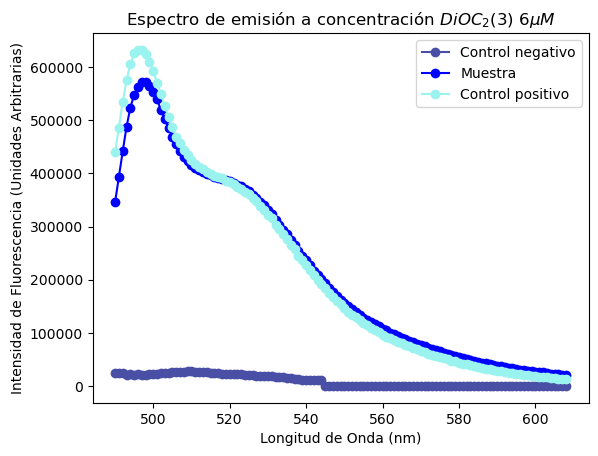

In [13]:
# Muestra con 2μ de DiOC_2(3)

for i in range(55, 160):
    neg[i][1] = neg[i][1] / 10

plt.plot(longitud_onda(neg[:119]), intensidad_fluorescencia(neg[:119]), marker='o', color="#494FA5", label='Control negativo')
plt.plot(longitud_onda(M2F[:119]), intensidad_fluorescencia(M2F[:119]), marker='o', linestyle='-', color='b', label = 'Muestra')
plt.plot(longitud_onda(P2F[:119]), intensidad_fluorescencia(P2F[:119]), marker='o', color='#9BF3F0', label='Control positivo')
plt.title(r'Espectro de emisión a concentración $DiOC_{2}(3)$ $6\mu M$')
plt.xlabel('Longitud de Onda (nm)') 
plt.ylabel('Intensidad de Fluorescencia (Unidades Arbitrarias)')
#plt.grid()
plt.legend()
plt.show()

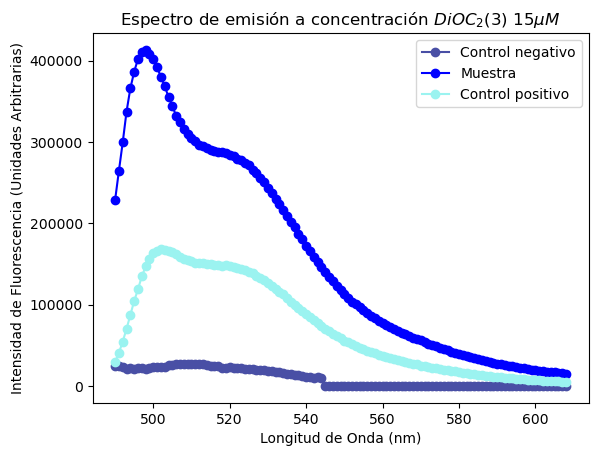

In [14]:
# Muestra con 5μ de DiOC_2(3)

for i in range(90, 160):
    P5F[i][1] = P5F[i][1] / 10

for i in range(90, 103):
    P5F[i][1] = P5F[i][1] * 10

plt.plot(longitud_onda(neg[:119]), intensidad_fluorescencia(neg[:119]), marker='o', color="#494FA5", label='Control negativo')
plt.plot(longitud_onda(M5F[:119]), intensidad_fluorescencia(M5F[:119]), marker='o', linestyle='-', color='b', label = 'Muestra')
plt.plot(longitud_onda(P5F[:119]), intensidad_fluorescencia(P5F[:119]), marker='o', color='#9BF3F0', label='Control positivo')
plt.title('Espectro de emisión a concentración $DiOC_{2}(3)$ $15\mu M$')
plt.xlabel('Longitud de Onda (nm)') 
plt.ylabel('Intensidad de Fluorescencia (Unidades Arbitrarias)')
#plt.grid()
plt.legend()
plt.show()

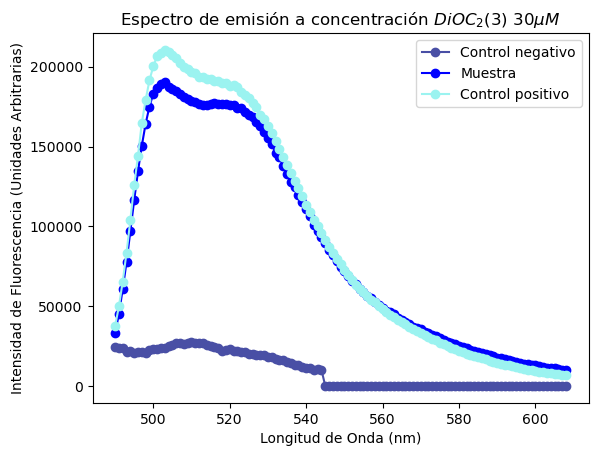

In [15]:
# Muestra con 10μ de DiOC_2(3)

for i in range(109, 160):
    P10F[i][1] = P10F[i][1] / 10



plt.plot(longitud_onda(neg[:119]), intensidad_fluorescencia(neg[:119]), marker='o', color="#494FA5", label='Control negativo')

plt.plot(longitud_onda(M10F[:119]), intensidad_fluorescencia(M10F[:119]), marker='o', linestyle='-', color='b', label = 'Muestra')
plt.plot(longitud_onda(P10F[:119]), intensidad_fluorescencia(P10F[:119]), marker='o', color='#9BF3F0', label='Control positivo')
plt.title('Espectro de emisión a concentración $DiOC_{2}(3)$ $30\mu M$')
plt.xlabel('Longitud de Onda (nm)') 
plt.ylabel('Intensidad de Fluorescencia (Unidades Arbitrarias)')
#plt.grid()
plt.legend()
plt.show()

Muestras a 37°C

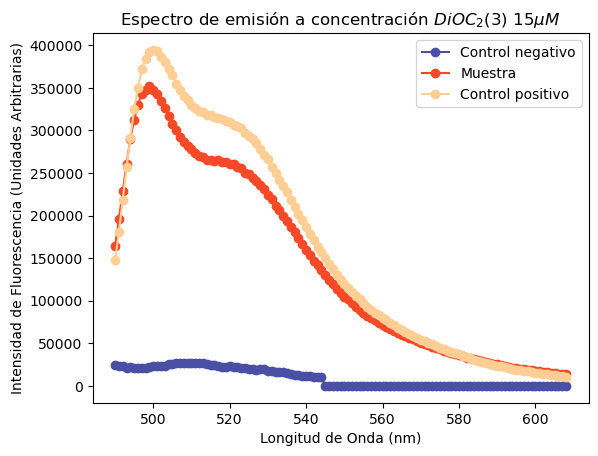

In [16]:
# Muestra con 5μ de DiOC_2(3)



plt.plot(longitud_onda(neg[:119]), intensidad_fluorescencia(neg[:119]), marker='o', color="#494FA5", label='Control negativo')

plt.plot(longitud_onda(M5C[:119]), intensidad_fluorescencia(M5C[:119]), marker='o', linestyle='-', color='#F54927', label = 'Muestra')
plt.plot(longitud_onda(P5C[:119]), intensidad_fluorescencia(P5C[:119]), marker='o', color="#FFCE95", label='Control positivo')
plt.title('Espectro de emisión a concentración $DiOC_{2}(3)$ $15\mu M$')
plt.xlabel('Longitud de Onda (nm)') 
plt.ylabel('Intensidad de Fluorescencia (Unidades Arbitrarias)')
#plt.grid()
plt.legend()
plt.show()

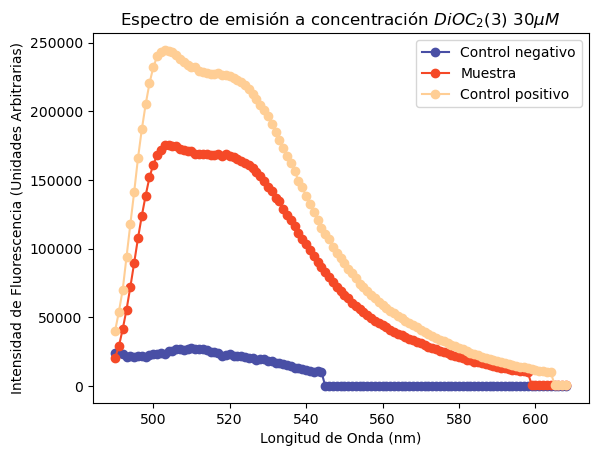

In [18]:
# Muestra con 10μ de DiOC_2(3)

for i in range(109, 160):
    M10C[i][1] = M10C[i][1] / 10

for i in range(115, 160):
    P10C[i][1] = P10C[i][1] / 10

plt.plot(longitud_onda(neg[:119]), intensidad_fluorescencia(neg[:119]), marker='o', color="#494FA5", label='Control negativo')

plt.plot(longitud_onda(M10C[:119]), intensidad_fluorescencia(M10C[:119]), marker='o', linestyle='-', color='#F54927', label = 'Muestra')
plt.plot(longitud_onda(P10C[:119]), intensidad_fluorescencia(P10C[:119]), marker='o', color="#FFCE95", label='Control positivo')
plt.title('Espectro de emisión a concentración $DiOC_{2}(3)$ $30\mu M$')
plt.xlabel('Longitud de Onda (nm)') 
plt.ylabel('Intensidad de Fluorescencia (Unidades Arbitrarias)')
#plt.grid()
plt.legend()
plt.show()

Control negativo

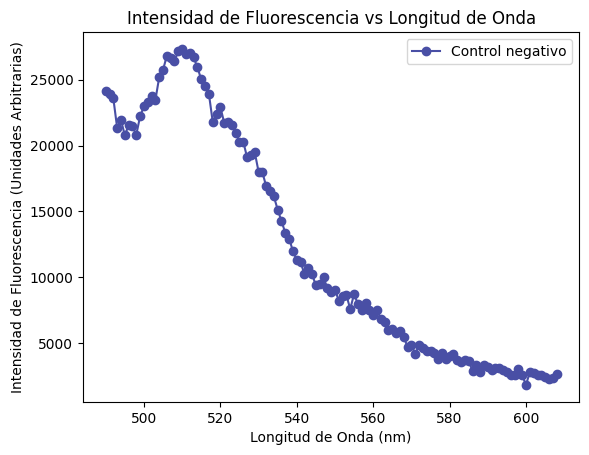

In [746]:
# Control negativo

plt.plot(longitud_onda(neg[:119]), intensidad_fluorescencia(neg[:119]), marker='o', color="#494FA5", label='Control negativo')
plt.title('Intensidad de Fluorescencia vs Longitud de Onda')
plt.xlabel('Longitud de Onda (nm)') 
plt.ylabel('Intensidad de Fluorescencia (Unidades Arbitrarias)')
#plt.grid()
plt.legend()
plt.show()